# DSC530 Final Project EDA and Analysis

## Introduction

### The Data

The dataset to be explored during this analysis is an open source dataset sourced from Openpsychometrics.org, which is a nonprofit effort to educate the public about psychology and to collect data for psychological research. The dataset is related to depression and anxiety and was collected between 2017 - 2019 with an on-line version of the Depression Anxiety Stress Scales. The survey included 42 questions, each with 4 response choices: 

* 1 = Did not apply to me at all 
* 2 = Applied to me to some degree, or some of the time
* 3 = Applied to me to a considerable degree, or a good part of the time
* 4 = Applied to me very much, or most of the time

Time spent on questions and the survey was also recorded, along with questions related to relationship status, sexual orientation, demographics, etc. 

### Initial Questions and Variables

Before beginning EDA and analysis on the above mentioned dataset, a few questions were considered of the data. The main questions in which we hope to address throughout this analysis are related to how strongly, if at all, particular predictors are related to depression level. Specifically, we are interested in how five variables are related to depression level, including education, religion, the area in which a person grew up, marital status, and family size. While there were many questions asked during the survey, we will focus on responses to the following three:

* Q9: "I found myself in situations that made me so anxious I was most relieved when they ended."
* Q17: "I felt I wasn't worth much as a person."
* Q31: "I was unable to become enthusiastic about anything."

Responses to these questions will give an idea about how depressed and/or anxious a person is. We will search for a correlation to this depression level with the chosen predictors, as described below:

* education: "How much education have you completed?", 1 = Less than high school, 2 = High school, 3 = University degree, 4 = Graduate degree
* religion: "What is your religion?", 1 = Agnostic, 2 = Atheist, 3 = Buddhist, 4 = Christian (Catholic), 5 = Christian (Mormon), 6 = Christian (Protestant), 7 = Christian (Other), 8 = Hindu, 9 = Jewish, 10 = Muslim, 11 = Sikh, 12 = Other
* urban: "What type of area did you live when you were a child?", 1 = Rural (country side), 2 = Suburban, 3 = Urban (town, city)
* married: "What is your marital status?", 1 = Never married, 2 = Currently married, 3 = Previously married
* familysize: "Including you, how many children did your mother have?"

## Exploratory Data Analysis

### Necessary Imports and Downloads

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook
import seaborn
import probscale
from scipy import stats
import statistics as s
import math
from pingouin import ttest
import statsmodels.formula.api as smf

df = pd.read_csv('data.csv', delimiter='\t')

### Histograms of Predictors

Text(0, 0.5, 'Count')

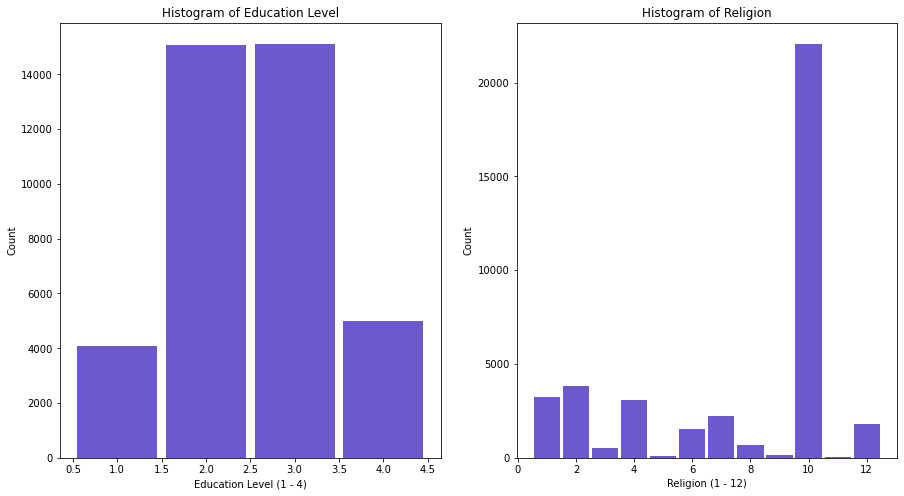

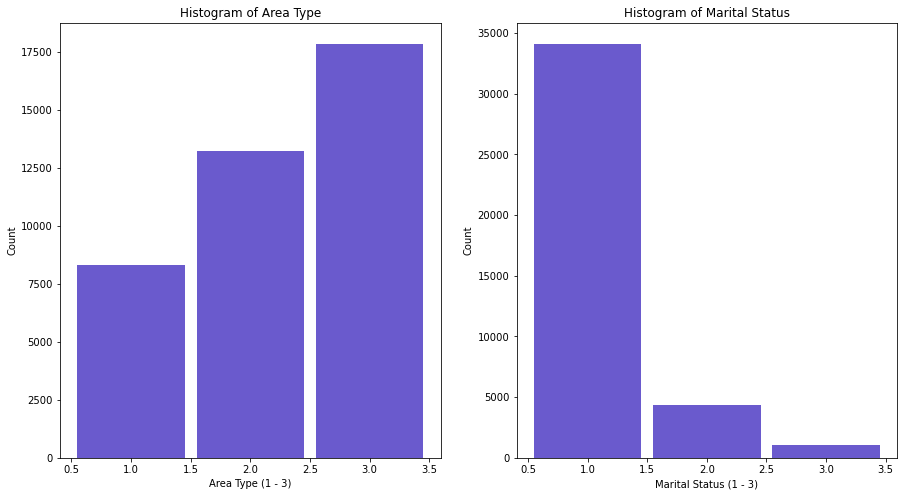

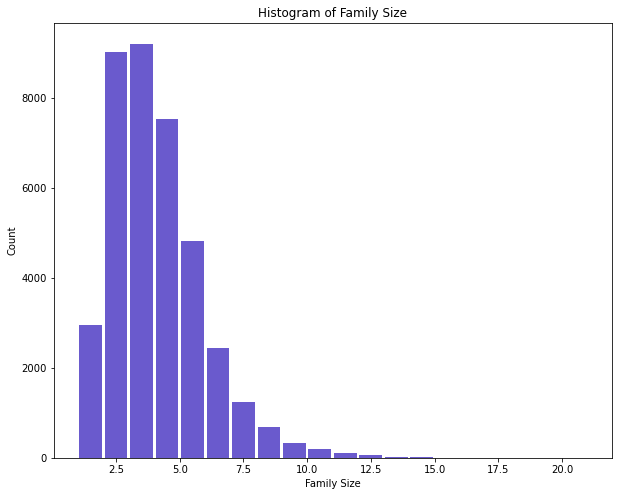

In [2]:
bins1 = np.arange(-0.5, 4) + 1
bins2 = np.arange(-0.5, 12) + 1
bins3 = np.arange(-0.5, 3) + 1
bins4 = np.arange(0, 21) + 1

figure, axes = plt.subplots(1, 2)

education_hist = df.plot(kind = 'hist', column = 'education', bins = bins1, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Education Level', ax = axes[0])
education_hist.set_xlabel("Education Level (1 - 4)")
education_hist.set_ylabel("Count")

religion_hist = df.plot(kind = 'hist', column = 'religion', bins = bins2, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Religion', ax = axes[1])
religion_hist.set_xlabel("Religion (1 - 12)")
religion_hist.set_ylabel("Count")

figure, axes = plt.subplots(1, 2)

urban_hist = df.plot(kind = 'hist', column = 'urban', bins = bins3, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Area Type', ax = axes[0])
urban_hist.set_xlabel("Area Type (1 - 3)")
urban_hist.set_ylabel("Count")

married_hist = df.plot(kind = 'hist', column = 'married', bins = bins3, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Marital Status', ax = axes[1])
married_hist.set_xlabel("Marital Status (1 - 3)")
married_hist.set_ylabel("Count")

familysize_hist = df.plot(kind = 'hist', column = 'familysize', bins = bins4, grid = False, figsize = (10, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Family Size')
familysize_hist.set_xlabel("Family Size")
familysize_hist.set_ylabel("Count")

### Histograms of Outcome Variables

Text(0, 0.5, 'Count')

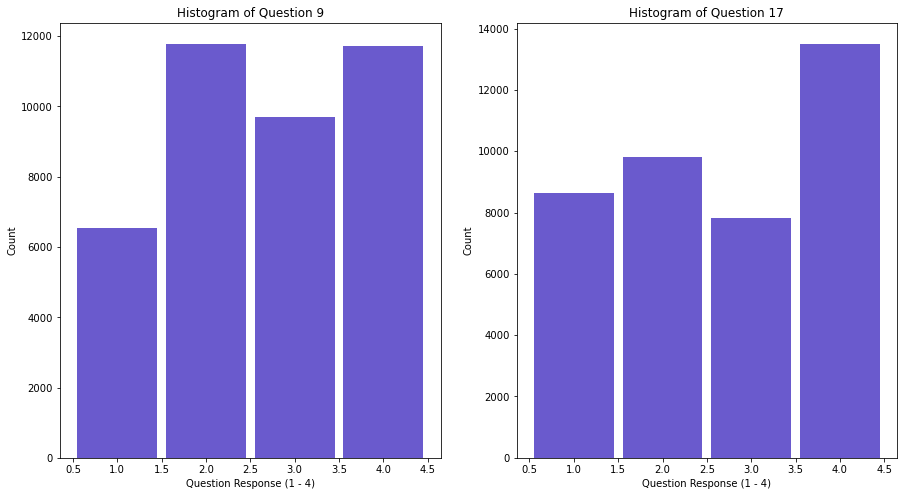

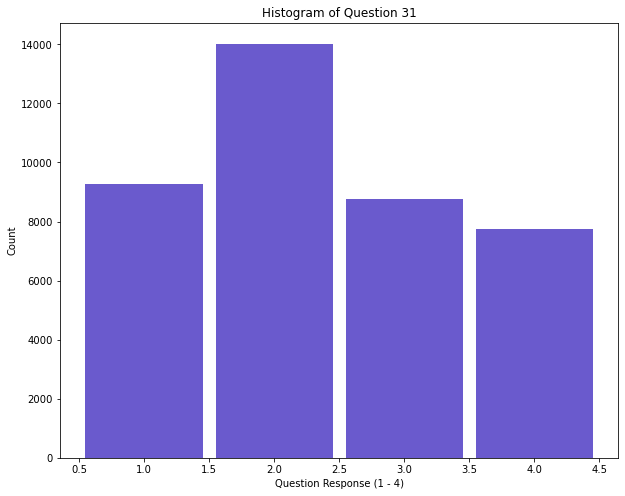

In [3]:
bins = np.arange(-0.5, 4) + 1

figure, axes = plt.subplots(1, 2)

q9_hist = df.plot(kind = 'hist', column = 'Q9A', bins = bins, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Question 9', ax = axes[0])
q9_hist.set_xlabel("Question Response (1 - 4)")
q9_hist.set_ylabel("Count")

q17_hist = df.plot(kind = 'hist', column = 'Q17A', bins = bins, grid = False, figsize = (15, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Question 17', ax = axes[1])
q17_hist.set_xlabel("Question Response (1 - 4)")
q17_hist.set_ylabel("Count")

q31_hist = df.plot(kind = 'hist', column = 'Q31A', bins = bins, grid = False, figsize = (10, 8), 
                         color = 'slateblue', zorder = 2, rwidth = 0.9, legend = False, 
                         title = 'Histogram of Question 31')
q31_hist.set_xlabel("Question Response (1 - 4)")
q31_hist.set_ylabel("Count")

### Examining Outliers

Being the only numeric variable being analyzed in our dataset, we need only examine the variable "Family Size" for outliers. To find outliers, we will utilize a boxplot to visualize these outliers. 

Text(9, 1.23, 'Maximum: 7.0')

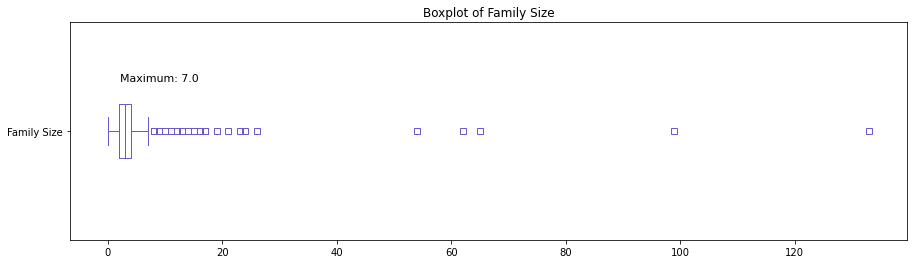

In [4]:
df.rename(columns = {'familysize' : 'Family Size'}, inplace = True)

boxplot_famsize = df.plot(kind = 'box', column = 'Family Size', grid = False, figsize = (15, 4), 
        color = 'slateblue', legend = False, vert = False, widths = 0.25, 
        title = 'Boxplot of Family Size', flierprops = dict(markeredgecolor = 'slateblue', 
                                                            marker = 's'))

data = cbook.boxplot_stats(pd.to_numeric(df['Family Size'], errors = 'coerce'))

box_max = data[0]['q3'] + (1.5 * data[0]['iqr'])

boxplot_famsize.text(9, 1.23, 'Maximum: ' + str(round(box_max, 1)), fontsize = 11,
                     horizontalalignment = 'center')


The boxplot above displays quite a few outliers. Given that this variable responds to the question, "Including you, how many children did your mother have?" we can reasonably assume that extreme outliers can be safely removed from the dataset as invalid entries. Although values greater than 7 are considered outliers in this dataset, it is not incredibly uncommon for a mother to have more than 7 children. Although the world record for number of children is 69, we can reasonably consider a number that high to be an anamoly. To account for mothers who have had a large number of children, while still excluding high outliers, we will set our maximum value at 10, removing values which are 11 or higher. 

In [5]:
df = df[df['Family Size'] <= 11]

### Descriptive Statistics

To help describe our variables and get a better understand of them, we will look as some descriptive statistics for our variables of interest. For our numeric variable, we will look and mean and mode, while for our categorical variables, we will look at the percentage of each in the dataset. We will also be removing values of '0', which correspond to a participant leaving that question blank. 

In [6]:
fs_mean = df['Family Size'].mean()
fs_mode = df['Family Size'].mode()

results = """
Family Size
-------------
Mean: {}
Mode: {}
""".format(round(fs_mean, 2), fs_mode[0])

print(results)


Family Size
-------------
Mean: 3.47
Mode: 3



Looking at our singular numeric variable of Family Size, the mean is 3.5, while the mode is 3. Thus, the average participant in this survey had 2-3 siblings, with the most common being 2 siblings. Because the Family Size variable includes the participant themself in the count, a response of '3' corresponds to 2 siblings, and 1 participant. 

In [7]:
df = df[df['education'] != 0]
df = df[df['religion'] != 0]
df = df[df['married'] != 0]
df = df[df['urban'] != 0]

ed_freq = df['education'].value_counts(normalize = True)
rel_freq = df['religion'].value_counts(normalize = True)
urb_freq = df['urban'].value_counts(normalize = True)
marr_freq = df['married'].value_counts(normalize = True)
q9_freq = df['Q9A'].value_counts(normalize = True)
q17_freq = df['Q17A'].value_counts(normalize = True)
q31_freq = df['Q31A'].value_counts(normalize = True)

results = """
       Percentages
-----------------------

Education
----------
Less than high school:     {}%
High school:               {}%
University degree:         {}%
Graduate degree:           {}%

Religion
---------
Agnostic:                  {}%
Atheist:                   {}%
Buddhist:                  {}%
Christian (Catholic):      {}%
Christian (Mormon):        {}%
Christian (Protestant):    {}%
Christian (Other):         {}%
Hindu:                     {}%
Jewish:                    {}%
Muslim:                    {}%
Sikh:                      {}%
Other:                     {}%

Area Type
----------
Rural (country side):      {}%
Suburban:                  {}%
Urban (town, city):        {}%

Marital Status
---------------
Never married:             {}%
Currently married:         {}%
Previously married:        {}%

Question 9: I found myself in situations that made me so anxious I was most relieved when they ended.
------------
Did not apply to me at all:                                             {}%
Applied to me to some degree, or some of the time:                      {}%
Applied to me to a considerable degree, or a good part of the time:     {}%
Applied to me very much, or most of the time:                           {}% 

Question 17: I felt I wasn't worth much as a person.
------------
Did not apply to me at all:                                             {}%
Applied to me to some degree, or some of the time:                      {}%
Applied to me to a considerable degree, or a good part of the time:     {}%
Applied to me very much, or most of the time:                           {}% 

Question 31: I was unable to become enthusiastic about anything.
------------
Did not apply to me at all:                                             {}%
Applied to me to some degree, or some of the time:                      {}%
Applied to me to a considerable degree, or a good part of the time:     {}%
Applied to me very much, or most of the time:                           {}% 
""".format(round(ed_freq[1] * 100, 2), round(ed_freq[2] * 100, 2), 
           round(ed_freq[3] * 100, 2), round(ed_freq[4] * 100, 2),
           round(rel_freq[1] * 100, 2), round(rel_freq[2] * 100, 2),
           round(rel_freq[3] * 100, 2), round(rel_freq[4] * 100, 2),
           round(rel_freq[5] * 100, 2), round(rel_freq[6] * 100, 2),
           round(rel_freq[7] * 100, 2), round(rel_freq[8] * 100, 2),
           round(rel_freq[9] * 100, 2), round(rel_freq[10] * 100, 2),
           round(rel_freq[11] * 100, 2), round(rel_freq[12] * 100, 2),
           round(urb_freq[1] * 100, 2), round(urb_freq[2] * 100, 2),
           round(urb_freq[3] * 100, 2), round(marr_freq[1] * 100, 2),
           round(marr_freq[2] * 100, 2), round(marr_freq[3] * 100, 2),
           round(q9_freq[1] * 100, 2), round(q9_freq[2] * 100, 2),
           round(q9_freq[3] * 100, 2), round(q9_freq[4] * 100, 2),
           round(q17_freq[1] * 100, 2), round(q17_freq[2] * 100, 2),
           round(q17_freq[3] * 100, 2), round(q17_freq[4] * 100, 2),
           round(q31_freq[1] * 100, 2), round(q31_freq[2] * 100, 2),
           round(q31_freq[3] * 100, 2), round(q31_freq[4] * 100, 2))

print(results)


       Percentages
-----------------------

Education
----------
Less than high school:     10.14%
High school:               38.23%
University degree:         38.78%
Graduate degree:           12.84%

Religion
---------
Agnostic:                  8.29%
Atheist:                   9.81%
Buddhist:                  1.35%
Christian (Catholic):      7.79%
Christian (Mormon):        0.31%
Christian (Protestant):    3.94%
Christian (Other):         5.74%
Hindu:                     1.77%
Jewish:                    0.36%
Muslim:                    55.93%
Sikh:                      0.16%
Other:                     4.54%

Area Type
----------
Rural (country side):      20.98%
Suburban:                  33.75%
Urban (town, city):        45.27%

Marital Status
---------------
Never married:             86.37%
Currently married:         10.93%
Previously married:        2.71%

Question 9: I found myself in situations that made me so anxious I was most relieved when they ended.
------------
Did not 

The output above displays the frequencies, in the form of percentages, of each of our categorical variables. A few notable observations from this includes the high percentage of those who identify as Muslim, the high percentage of those who grew up in urban areas, the high percentage of those who have never been married--along with the low percentage of those who have been previously married--, and the relatively even split in responses among the three questions we are observing. 

These percentages appear to correspond closely with the histograms created above. One notable mention is the histogram of Family Size, which appears to be unimodal with a long right skew. The analysis on outliers above agreed with the distribution, and we have since removed high outliers. 

## Variable Analysis

### Probability Mass Function (PMF) and Cumulative Density Function (CDF)

In [8]:
married_df = df[df["married"] == 2]["Q17A"]
notmarried_df = df[df["married"] == 1]["Q17A"]

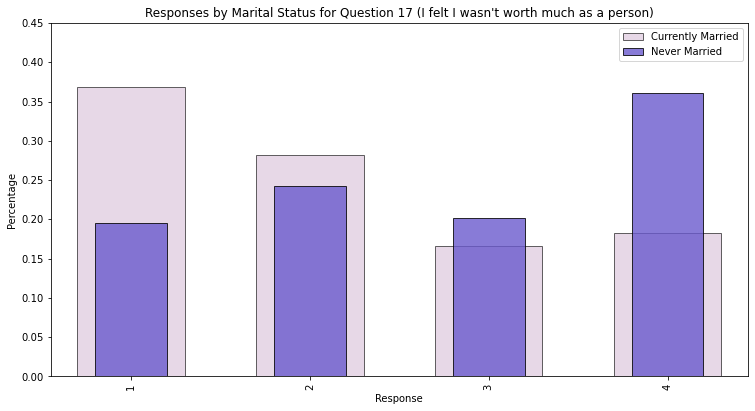

In [9]:
pmf_married = married_df.value_counts().sort_index() / len(married_df)
pmf_notmarried = notmarried_df.value_counts().sort_index() / len(notmarried_df)

fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)

plt.title("Responses by Marital Status for Question 17 (I felt I wasn't worth much as a person)")

pmf_married.plot(kind = 'bar', width = .6, edgecolor = 'black', color = 'thistle', alpha = 0.6,
                label = "Currently Married")
pmf_notmarried.plot(kind = 'bar', width = .4, edgecolor = 'black', color = 'slateblue', alpha = 0.8,
                   label = "Never Married")

plt.legend(loc = 'upper right')

plt.ylim([0, 0.45])
plt.xlabel('Response')
plt.ylabel('Percentage')

plt.tight_layout
plt.show()

The PMF's above correspond to responses from those who have never been married and those who are currently married. As is evident by the plots shown, it appears that those who are currently married have a greater likelihood to respond "Did not apply to me at all" or "Applied to me to some degree, or some of the time" to the question "I felt I wasn't worth much as a person". It is also evident that those who have never been married have a greater likelihood to response "Applied to me to a considerable degree, or a good part of the time" or "Applied to me very much, or most of the time" to the question "I felt I wasn't worth much as a person". This may suggest that being in a long-term committed partnership leads to a feeling of greater self-worth. 

In [10]:
pmf_q17 = df['Q17A'].value_counts().sort_index() / len(df['Q17A'])
cdf_q17 = pmf_q17.cumsum()

<AxesSubplot:title={'center':"CDF of Question 17 (I felt I wasn't worth much as a person.)"}>

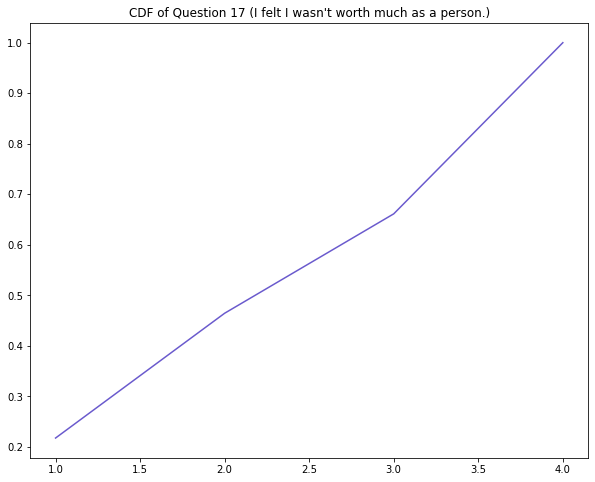

In [11]:
cdf_q17.plot(grid = False, figsize = (10, 8), color = 'slateblue', 
             title = "CDF of Question 17 (I felt I wasn't worth much as a person.)")

The CDF above corresponds to the response to the question, "I felt I wasn't worth much as a person". As is evident by the plot, there is not much change from one response to the next, with only a slight increase from 3 to 4, or "Applied to me to a considerable degree, or a good part of the time" to "Applied to me very much, or most of the time". This suggests that across the board, regardless of education, religion, area, maritial status, or family size, there is a relatively even distribution between those who feel worthy as a person, versus those who do not. This is important when we refer back to our previous discussion of married versus non-married individuals, because if there were no difference between the two groups, we would expect to see similar numbers for each response. Thus, this solidifies our previous conclusion that being in a long-term committed partnership leads to a feeling of greater self-worth. It also suggests a generally even split across the board of those who lack self worth and those who do not. 

### Analysis of Distribution

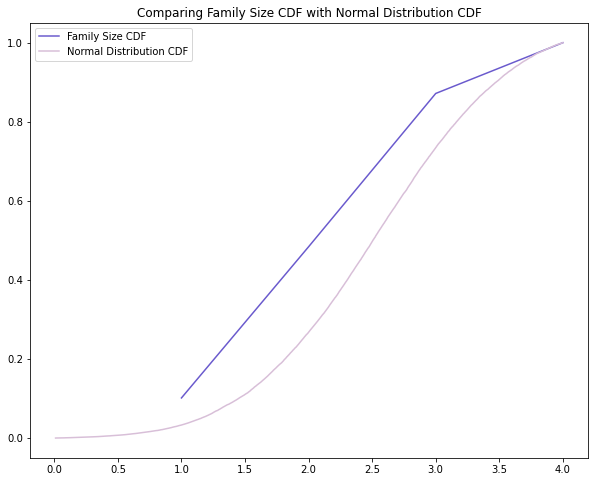

In [12]:
pmf_fam_size = df['education'].value_counts().sort_index() / len(df['education'])
cdf_fam_size = pmf_fam_size.cumsum()

lower, upper = 0, 4
mu, sigma = s.mean(df["education"]), s.stdev(df["education"])
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc = mu, scale = sigma)

sample = pd.Series(X.rvs(len(df["education"])))

pmf_norm = sample.value_counts().sort_index() / len(sample)
cdf_norm = pmf_norm.cumsum()

cdf_fam_size.plot(grid = False, figsize = (10, 8), color = 'slateblue', 
             title = "Comparing Family Size CDF with Normal Distribution CDF",
                 label = "Family Size CDF")

cdf_norm.plot(color = "thistle", label = "Normal Distribution CDF")

plt.legend(loc = 'upper left')

The analytical distribution plotted above compares the variable "education" to the normal distribution, given a sigma and mu which correspond to our variable. Although the "education" variable is discrete, we can consider it leveled, as the lowest level corresponds to less than high school, and the highest level corresponds to graduate degree. The discrete nature of the "education" variable is evident in the plot, and is compared with a continuous application of the normal distribution. Although the normal distribution lies slightly below the distribution for education, it appears to follow a very similar trend, and thus education may follow a normal distribution. Now that we know that a normal distribution is appropraite for this variable, we can consider it in conjunction with other normality assumption for linear regression. Further, given that it is normal, we can consider our sample to be representative of the population. 

### Comparing Variables

Text(0, 0.5, 'Mean Response')

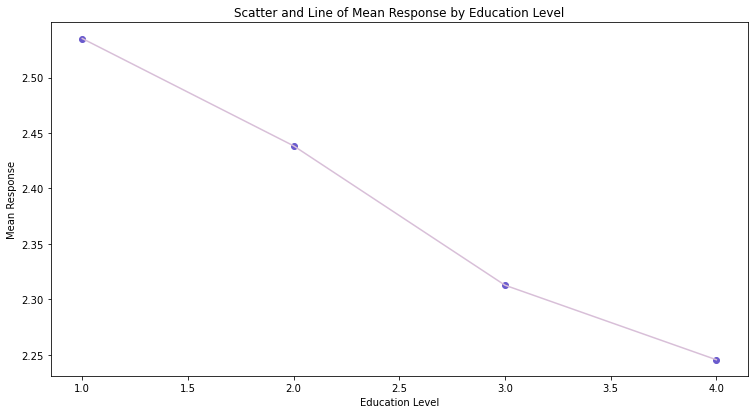

In [13]:
data = df.groupby('education')['Q31A'].mean()

mean_data = data.to_frame().reset_index()
mean_data.index = mean_data.index + 1

fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)

plt.title("Scatter and Line of Mean Response by Education Level")

plt.scatter(y = mean_data["Q31A"], x = mean_data["education"], color = 'slateblue')
plt.plot(mean_data["Q31A"], color = "thistle")

plt.xlabel('Education Level')
plt.ylabel('Mean Response')

Text(0, 0.5, 'Mean Response')

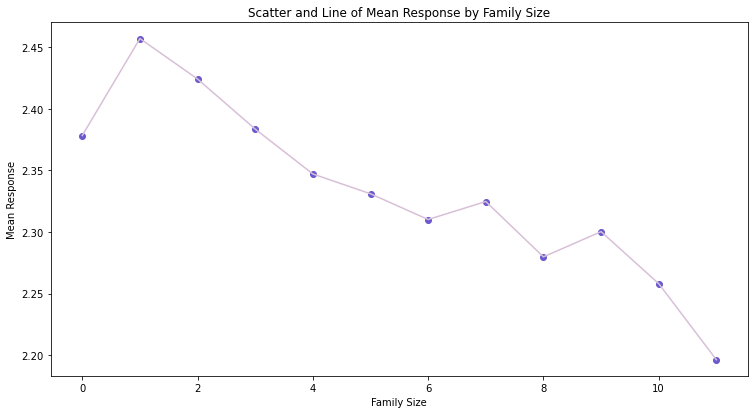

In [14]:
data = df.groupby('Family Size')['Q31A'].mean()

mean_data = data.to_frame().reset_index()
mean_data.index = mean_data.index

fig = plt.gcf()
fig.set_size_inches(12.5, 6.5)

plt.title("Scatter and Line of Mean Response by Family Size")

plt.scatter(y = mean_data["Q31A"], x = mean_data["Family Size"], color = 'slateblue')
plt.plot(mean_data["Q31A"], color = "thistle")

plt.xlabel('Family Size')
plt.ylabel('Mean Response')

Due to the discrete nature of our data, a scatterplot would not be very meaningful for examining the overall relationship between different variables. Therefore, in order to examine the shape and strength of the relationship between selected variables, we will examine the mean for each group, plotting the points for those means, along with a connecting line, to examine the relationship. 

We will be examining the relationship between question 31, which states "I was unable to become enthusiastic about anything" and both family size and education level. Thus, to examine these relationships, we will compute the mean response for each education level (where the level of education increases as the indicator increases), and for each quantity of family size. 

The plots above display these relationships--showing slight negative relationships between each of the variables. However, although this relatinoship is clearly linear in nature and negative, the range of mean responses is very small, ranging from 2.24 to 2.53 for education level, and ranging from 2.19 to 2.45 for family size, thus suggesting that question responses are relatively similar across the board. 

In [15]:
np.cov(df["Q31A"], df["education"])[0,1]

-0.07346181940067698

In [16]:
np.cov(df["Q31A"], df["Family Size"])[0,1]

-0.0777988460756336

In [17]:
df["education"].corr(df["Q31A"])

-0.08370573803650956

In [18]:
df["Family Size"].corr(df["Q31A"])

-0.0403211063784694

In an attempt to quantify the strength between the linear relationships displayed above, we examine the covariance and correlation coefficients between our variables. As shown in the plots, both of the variable pairs have negative relationships. However, as seen in the small correlation coefficient, the relationship is very weak, suggesting that education and family size are not great predictors of a person's response to the statement, "I was unable to become enthusiastic about anything".

## Testing Significance

### Hypothesis Test

We will now test the relationship explored before regarding differences in self-worth for those who are married and those who are not. We will perform a t-test to compare the average response to the statement "I felt I wasn't worth much as a person" for those who are married and those who are not.

In [19]:
marriage_data = pd.DataFrame(
                {'married': df.loc[df['married'] == 2]['Q17A'],
                 'not_married': df.loc[df['married'] == 1]['Q17A']})

In [20]:
ttest(marriage_data['married'], marriage_data['not_married'], correction = False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-30.230306,37257,two-sided,2.378768e-198,"[-0.6, -0.53]",0.495983,1.409e+194,1.0


In [21]:
marriage_data.describe()

,married,not_married
count,4185.000000,33074.000000
mean,2.161290,2.727460
std,1.112691,1.145103
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,4.000000,4.000000


The mean response to the statement "I felt I wasn't worth much as a person" for those who were married was 2.157 (with a standard deviation of 1.112), whereas the mean response for those who were not married was 2.730 (with a standard deviation of 1.146). A Student’s independent samples t-test showed that this difference was significant (t(38486) = -31.164, p < 0.05), suggesting that a genuine difference in response for those who are married and those who are not married exists. 

### Regression Analysis

To further attempt to predict marital status based on response to the statement "I  felt I wasn't worth much as a person", we will now fit a logistic regression model, where marital status is the outcome variable and response to the statement is the predictor. 

In [22]:
model = smf.mnlogit('married ~ Q17A', data = df)
results = model.fit()
results.summary() 

Optimization terminated successfully.
         Current function value: 0.453901
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                married   No. Observations:                38295
Model:                        MNLogit   Df Residuals:                    38291
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                 0.02634
Time:                        16:14:43   Log-Likelihood:                -17382.
converged:                       True   LL-Null:                       -17852.
Covariance Type:            nonrobust   LLR p-value:                5.620e-205
==============================================================================
 married=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0136      0.037    -27.473      0.000      -1.086      -0.941
Q17A          -0.4316      0.015    -29.140      0.000      -0.461      -0.403
------------------------------------------------------------------------------
 married=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8637      0.074    -38.897      0.000      -3.008      -2.719
Q17A          -0.2331      0.027     -8.507      0.000      -0.287      -0.179
==============================================================================
"""

In [23]:
sample = pd.DataFrame({'Q17A': [1, 2, 3, 4]})
result = results.predict(sample)
result[[1, 2]]

,1,2
0,0.184021,0.035283
1,0.128771,0.030109
2,0.088167,0.025140
3,0.059410,0.020659


After performing a logisitc regression for predicting if a person is married based on their response to the statement "I felt I wasn't worth much as a person", it appears that the probability that a person is married is much lower across the board if a person responsed with any sort of agreement to the statement, while the probability that they are not married is much higher. For example, if a person responded '4' to the statement--meaning they strongly agree with the statement--their probability of being married is only 2.1%, while their probability of not being married is 5.9%.